# 1.0 Causes of Absenteism
## 1.1 Introduction

The main aim for this project is to find out the causes of absenteism at work. The dataset used is obtained from [UCI repository](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work#) and the data link is: [Absenteism at work](https://docs.google.com/spreadsheets/d/1KUwbcurAlA7Y7pQAjtzCBCdiYomDMiBxhqkuUfIDXxI/edit?usp=sharing). 

The dataset was put together by Brazilian researchers studying for causes of absence at work. A detailed description of each column is available [here](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work#).



>* Looking at the data provided, it's noted that it's a classification case. Therefore, i'll use decision trees classifier to predict whether or not an employee is a social drinker, based on their attendance record.

>* I'll further use random Forest Classifier, to find out if the model performance will improve. later, I'll use XGBoost Classifier.

### 1.1.1 Loading libraries and Data

In [ ]:
# Importing the pandas and numpy libraries
import numpy as np
import pandas as pd

#load the data
data = pd.read_excel('/content/Absenteeism_at_work.xlsx', index_col='ID')

data.head(3)


,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0


In [ ]:
# preview the column names
data.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

**Observation**
>* From the results above, the naming of the columns need to be corrected by removing the white spaces and putting the underscores.

The next thing I'll do to to check the summary statistics.

In [ ]:
#displaying the dataset
data.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Familiarize yourself with the various columns above. In particular note that Social drinker, Social smoker, Month of absence, Day of the week, Seasons, and Reason for absence are all categorical, whereas the rest is continuous.

Let's select a few independent variables to use. We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few. Feel free to change which variables are picked and experiment with the model. 

In [ ]:
# Make a copy of the original data frame
df = pd.read_excel('/content/Absenteeism_at_work.xlsx')
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239.554,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239.554,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3.0,23.0,7.0,6.0,1.0,179.0,51.0,18.0,38.0,239.554,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
6,10.0,22.0,7.0,6.0,1.0,361.0,52.0,3.0,28.0,239.554,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20.0,23.0,7.0,6.0,1.0,260.0,50.0,11.0,36.0,239.554,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14.0,19.0,7.0,2.0,1.0,155.0,12.0,14.0,34.0,239.554,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1.0,22.0,7.0,2.0,1.0,235.0,11.0,14.0,37.0,239.554,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [ ]:
df['Social drinker'].unique()

array([1., 0.])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = data['Social drinker'].values
y





array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
import numpy as np
np.random.seed

<function RandomState.seed>

In [ ]:
seed = 0

In [ ]:
test_features = ['Day of the week', 'Distance from Residence to Work', 'Age',
                 'Body mass index', 'Disciplinary failure', 'Education']
# We should be able to use nearly all the other features, but for the sake of 
# simplifying our visualization later, we only pick a few.
X = data[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=seed)

Let's finally create our model and assess its accuracy. Checking the accuracy of a classifier is easy thanks to the metrics.accuracy_score function.

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))
print('classification report')
print(metrics.classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------------------------")


confusion matrix
[[59  0]
 [ 0 89]]
classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        59
         1.0       1.00      1.00      1.00        89

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148

-----------------------------------------------------------------------------------------


If you used the default features I've provided, this should look extremely accurate! How do you interpret such a high accuracy score? How well do you think this dataset would do in predicting the behavior of folks from other companies, or other countries? 

To get a better sense of the inner workings of our decision tree, let's visualize it. Note in particular some parameters in the export_graphviz function:


1.   The first parameter should be your model
2.   The feature_names parameter should have all the names of your independent variables. It's often handy to have a variable that stores that.
3. class_names is a list of the various categories you are classifying. There should be as many entries as there are categories for your dependent variable - In this case Social drinker has two values: 0, and 1. We give matching class names to each: 'Not a social drinker', 'Social drinker'



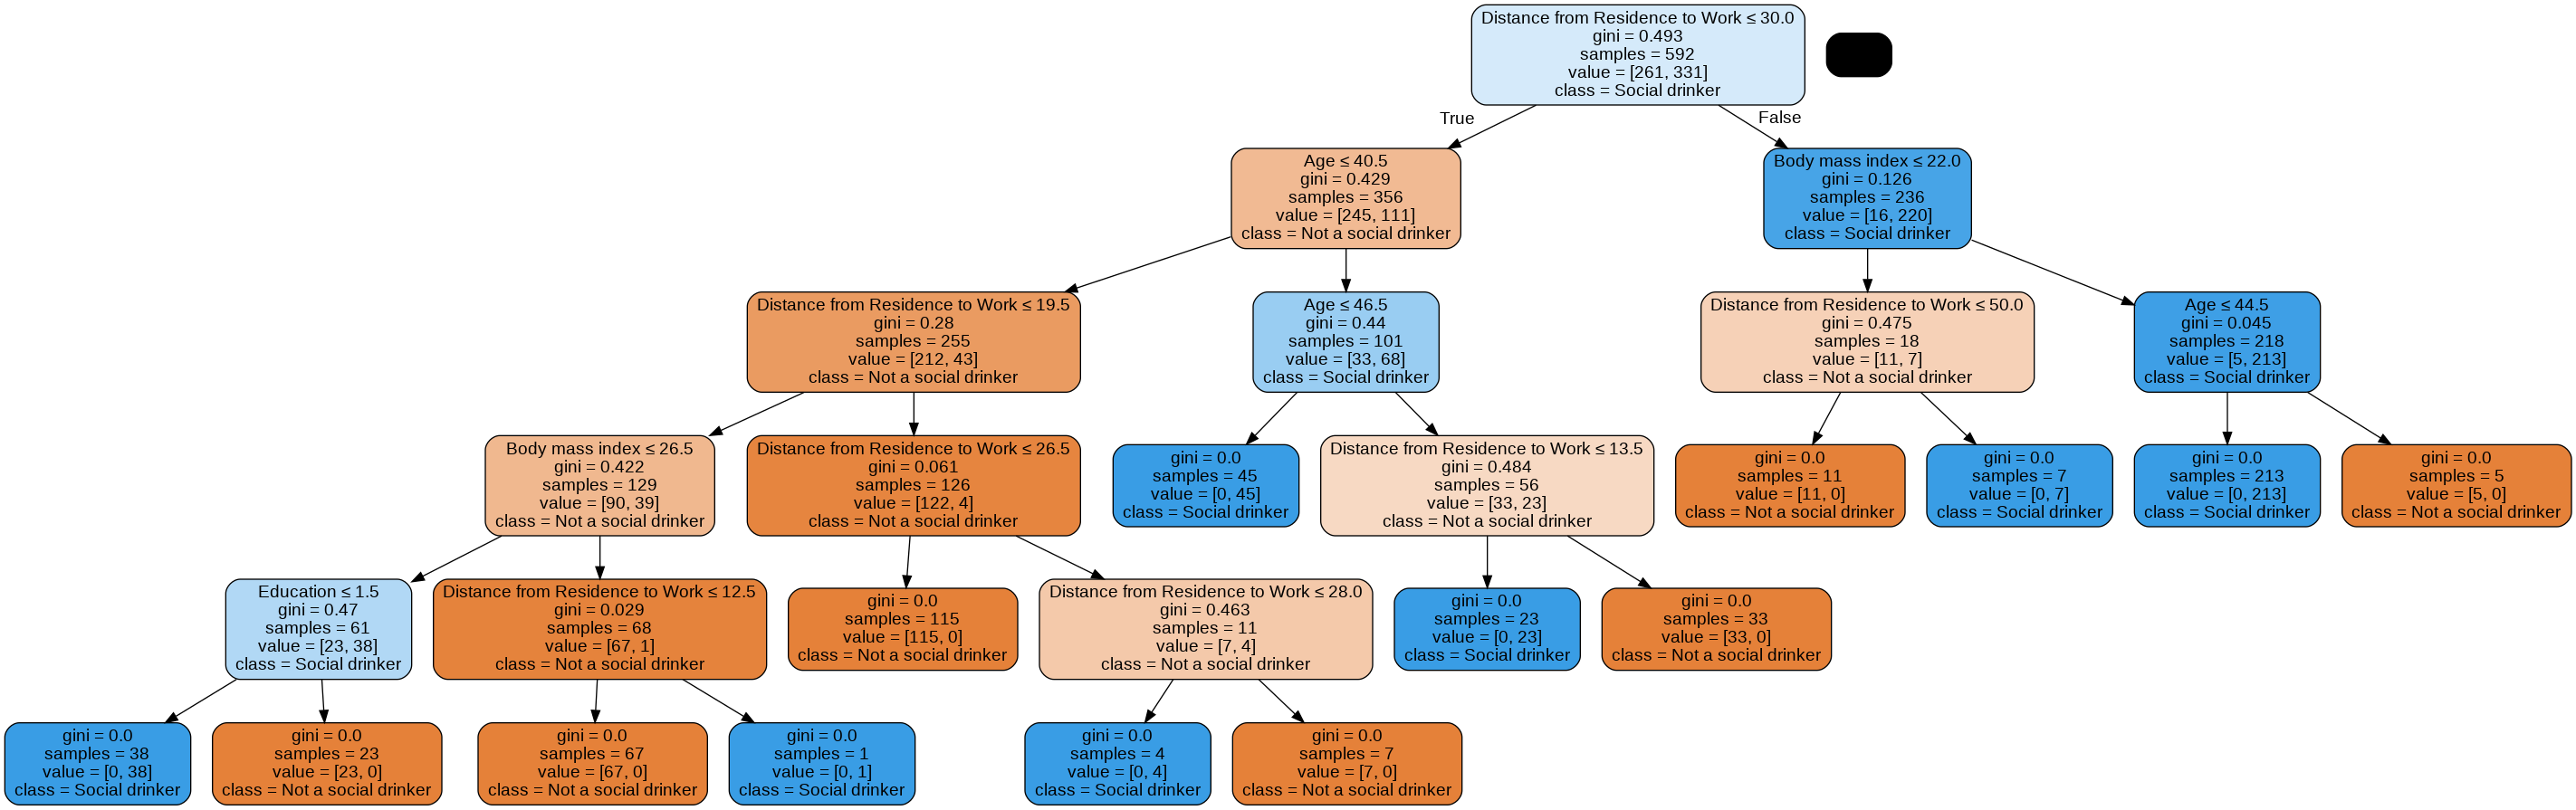

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Not a social drinker', 'Social drinker'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism.png')
Image(graph.create_png())

In [ ]:
test_features

['Day of the week',
 'Distance from Residence to Work',
 'Age',
 'Body mass index',
 'Disciplinary failure',
 'Education']

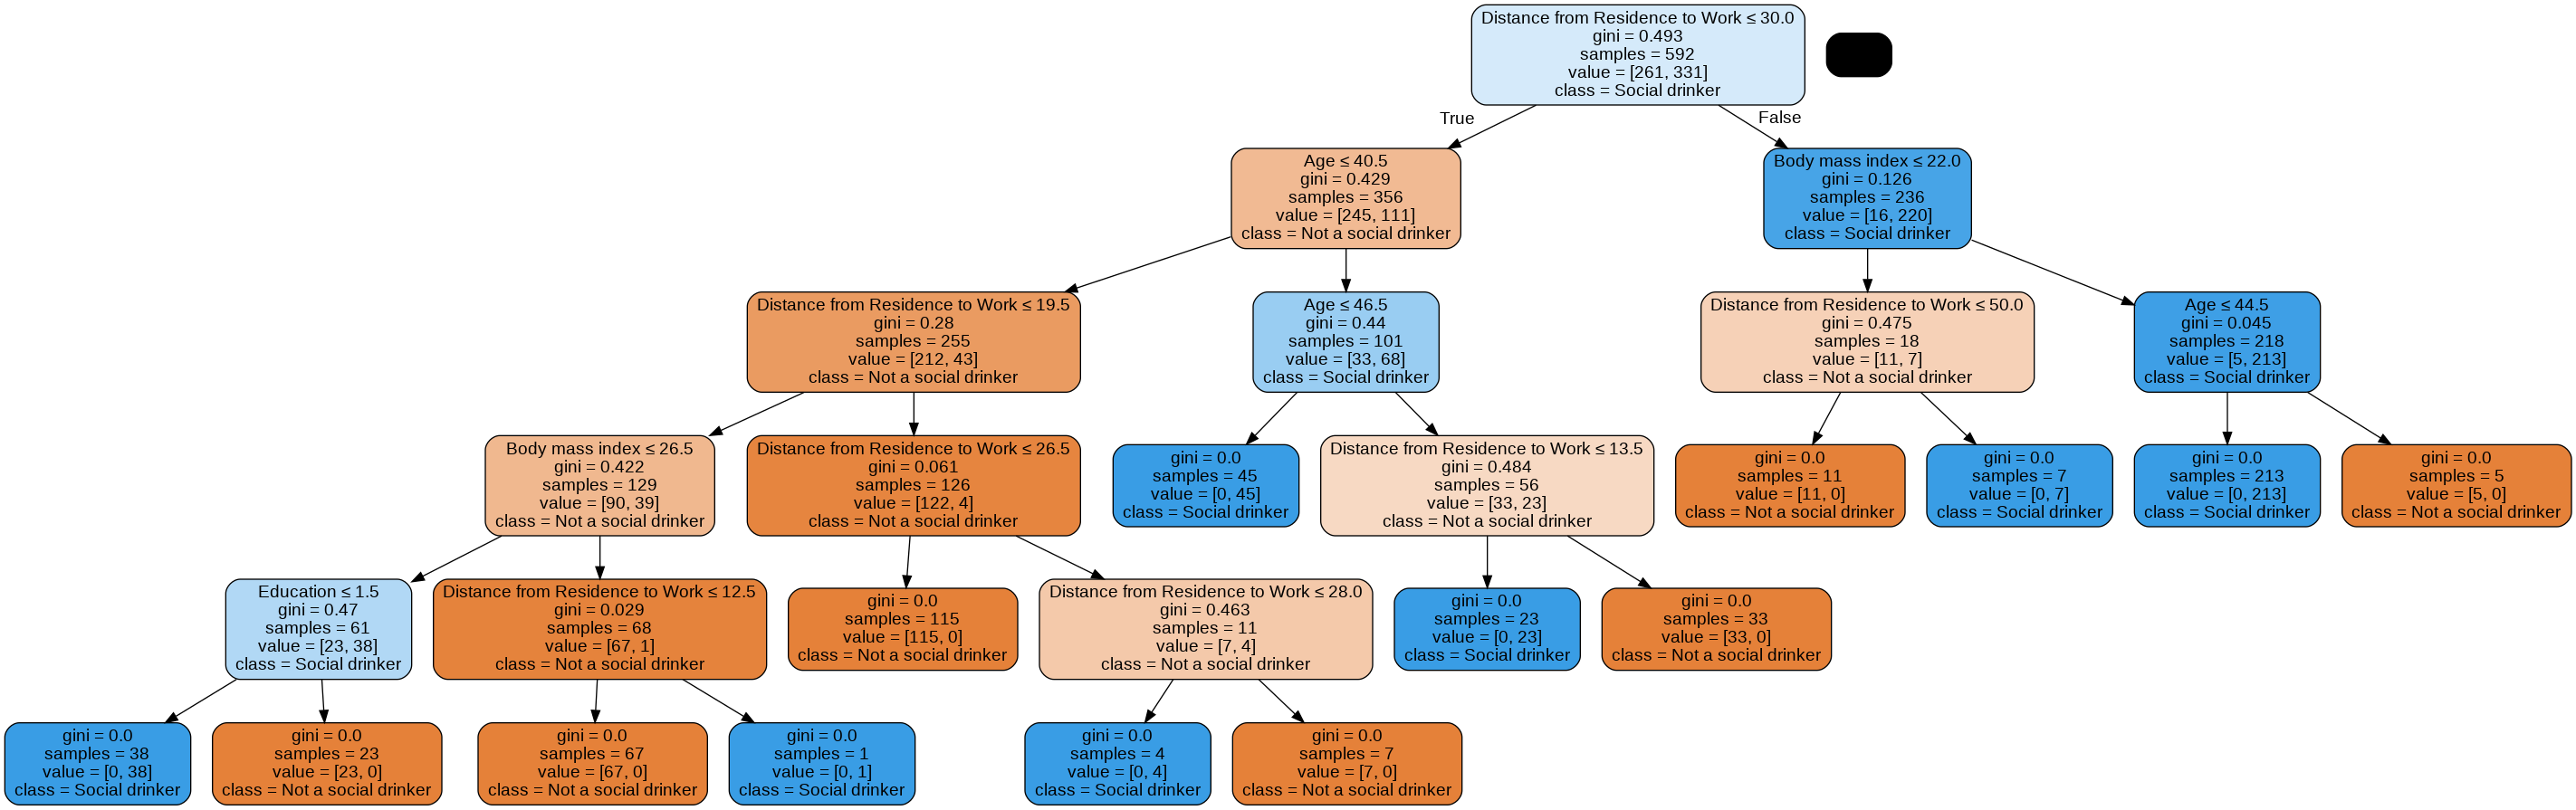

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Not a social drinker', 'Social drinker'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism.png')
Image(graph.create_png())

Let's try and make some sense of this graph, starting from the **root node**

The first test we perform is based on distance from residence to work. The datasets are split based on a distance of 30. Notice the value parameter. For me, value = [233, 285] (Note that this may look slightly different to you based on your training data). This means that in our current training set, there are 233 non social drinkers, and 285 social drinkers. Because of this majority, my root node has a class of *social drinker*

Let's look at the left children of our root node. This node has a class of *not a social drinker*, indicating that the left side of our tree should have a bias towards non social drinkers. If you look at the values there, you should clearly see that.

In my example, the left child has value = [219, 91]: Using that first test, we were able to isolate almost all non drinkers! As expected, the right children of our root node has a class of *social drinker*, with values to match: [14, 194]

A few things of interest as well:


*   Each node has a ***gini*** value. We will cover those in depth in our next section on optimization
*   Not all of our features were used, for example *Day of the week* appears nowhere in our tree, suggesting that our dependent variable does not majorly depend on it.

Time for some practice problems


In [ ]:
test_features_new = data.columns.drop('Seasons')
test_features_new

Index(['Reason for absence', 'Month of absence', 'Day of the week',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

# Challenge 1

Using the same dataset, build a model that predicts the month when an absence occurs. You have a few constraints in doing this:


*   You should use all features available, except for *Season*
*   Limit your maximum depth to 5, you can set that when creating your classifier: tree = DecisionTreeClassifier(max_depth=5)
*   Visualize your decision tree, then determine if you need to also set a min_samples_split variable in your next iteration (tree = DecisionTreeClassifier(max_depth=5, min_samples_split = ?))

Answer the following questions:


1.   How accurate is your model? How accurate is it after adding a min_samples_split?
2.   Which features are most relevant in determining our dependent variable? Does it make intuitive sense to you?






In [ ]:
data.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [ ]:
data.groupby('Month of absence').mean()

,Reason for absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Month of absence,,,,,,,,,,,,,,,,,,,
0.0,0.000000,4.333333,2.000000,176.000000,31.333333,13.666667,44.000000,271.219000,95.000000,0.000000,1.000000,1.333333,0.666667,0.000000,3.666667,91.666667,171.666667,31.333333,0.000000
1.0,22.740000,3.740000,2.000000,182.120000,24.200000,12.260000,34.960000,314.797660,96.400000,0.000000,1.360000,0.700000,0.320000,0.080000,0.440000,78.480000,172.820000,26.200000,4.440000
2.0,21.791667,4.111111,2.000000,210.958333,35.902778,13.138889,35.277778,270.207292,97.208333,0.000000,1.277778,0.611111,0.583333,0.027778,0.708333,78.375000,171.694444,26.680556,4.083333
3.0,19.367816,3.827586,2.310345,218.390805,31.919540,13.724138,37.298851,268.159851,97.413793,0.045977,1.275862,1.172414,0.597701,0.103448,0.563218,77.471264,171.310345,26.436782,8.793103
4.0,20.377358,4.264151,3.000000,225.547170,27.056604,12.245283,36.641509,274.851264,94.603774,0.018868,1.320755,1.245283,0.547170,0.075472,0.754717,78.792453,173.207547,26.245283,9.094340
5.0,16.546875,3.859375,3.000000,224.625000,24.531250,11.968750,36.328125,275.067500,97.250000,0.093750,1.640625,1.078125,0.484375,0.140625,0.687500,78.609375,174.906250,25.671875,6.250000
6.0,18.537037,3.833333,2.407407,204.833333,28.388889,12.907407,37.907407,298.012481,95.055556,0.055556,1.351852,0.592593,0.574074,0.074074,1.000000,79.240741,172.703704,26.481481,7.611111
7.0,18.253731,3.865672,1.000000,231.671642,29.432836,11.835821,36.223881,249.814418,95.029851,0.029851,1.208955,1.223881,0.656716,0.074627,0.776119,80.179104,172.835821,26.776119,10.955224
8.0,21.370370,3.777778,1.000000,243.000000,31.685185,12.203704,37.407407,238.005222,92.944444,0.000000,1.277778,1.185185,0.629630,0.166667,0.944444,81.055556,171.444444,27.537037,5.333333


In [ ]:
y = data['Month of absence'].values
y

array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 12., 12., 12., 12.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3

In [ ]:
test_features_new = data.columns.drop('Seasons')
test_features_new
# We should be able to use nearly all the other features, but for the sake of 
# simplifying our visualization later, we only pick a few.
X = data[test_features_new].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=seed)

In [ ]:
# Create a decision tree classifier

tree_ = DecisionTreeClassifier()

# Train it on our training set.
tree_ = tree_.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree_.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))
print('classification report')
print(metrics.classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------------------------")


confusion matrix
[[ 1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9]]
classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00        11
         3.0       1.00      1.00      1.00        21
         4.0       1.00      1.00      1.00        11
         5.0       1.00      1.00      1.00        14
         6.0       1.00      1.00  

In [ ]:
data['Month of absence'].value_counts()

3.0     87
2.0     72
10.0    71
7.0     67
5.0     64
11.0    63
8.0     54
6.0     54
9.0     53
4.0     53
1.0     50
12.0    49
0.0      3
Name: Month of absence, dtype: int64

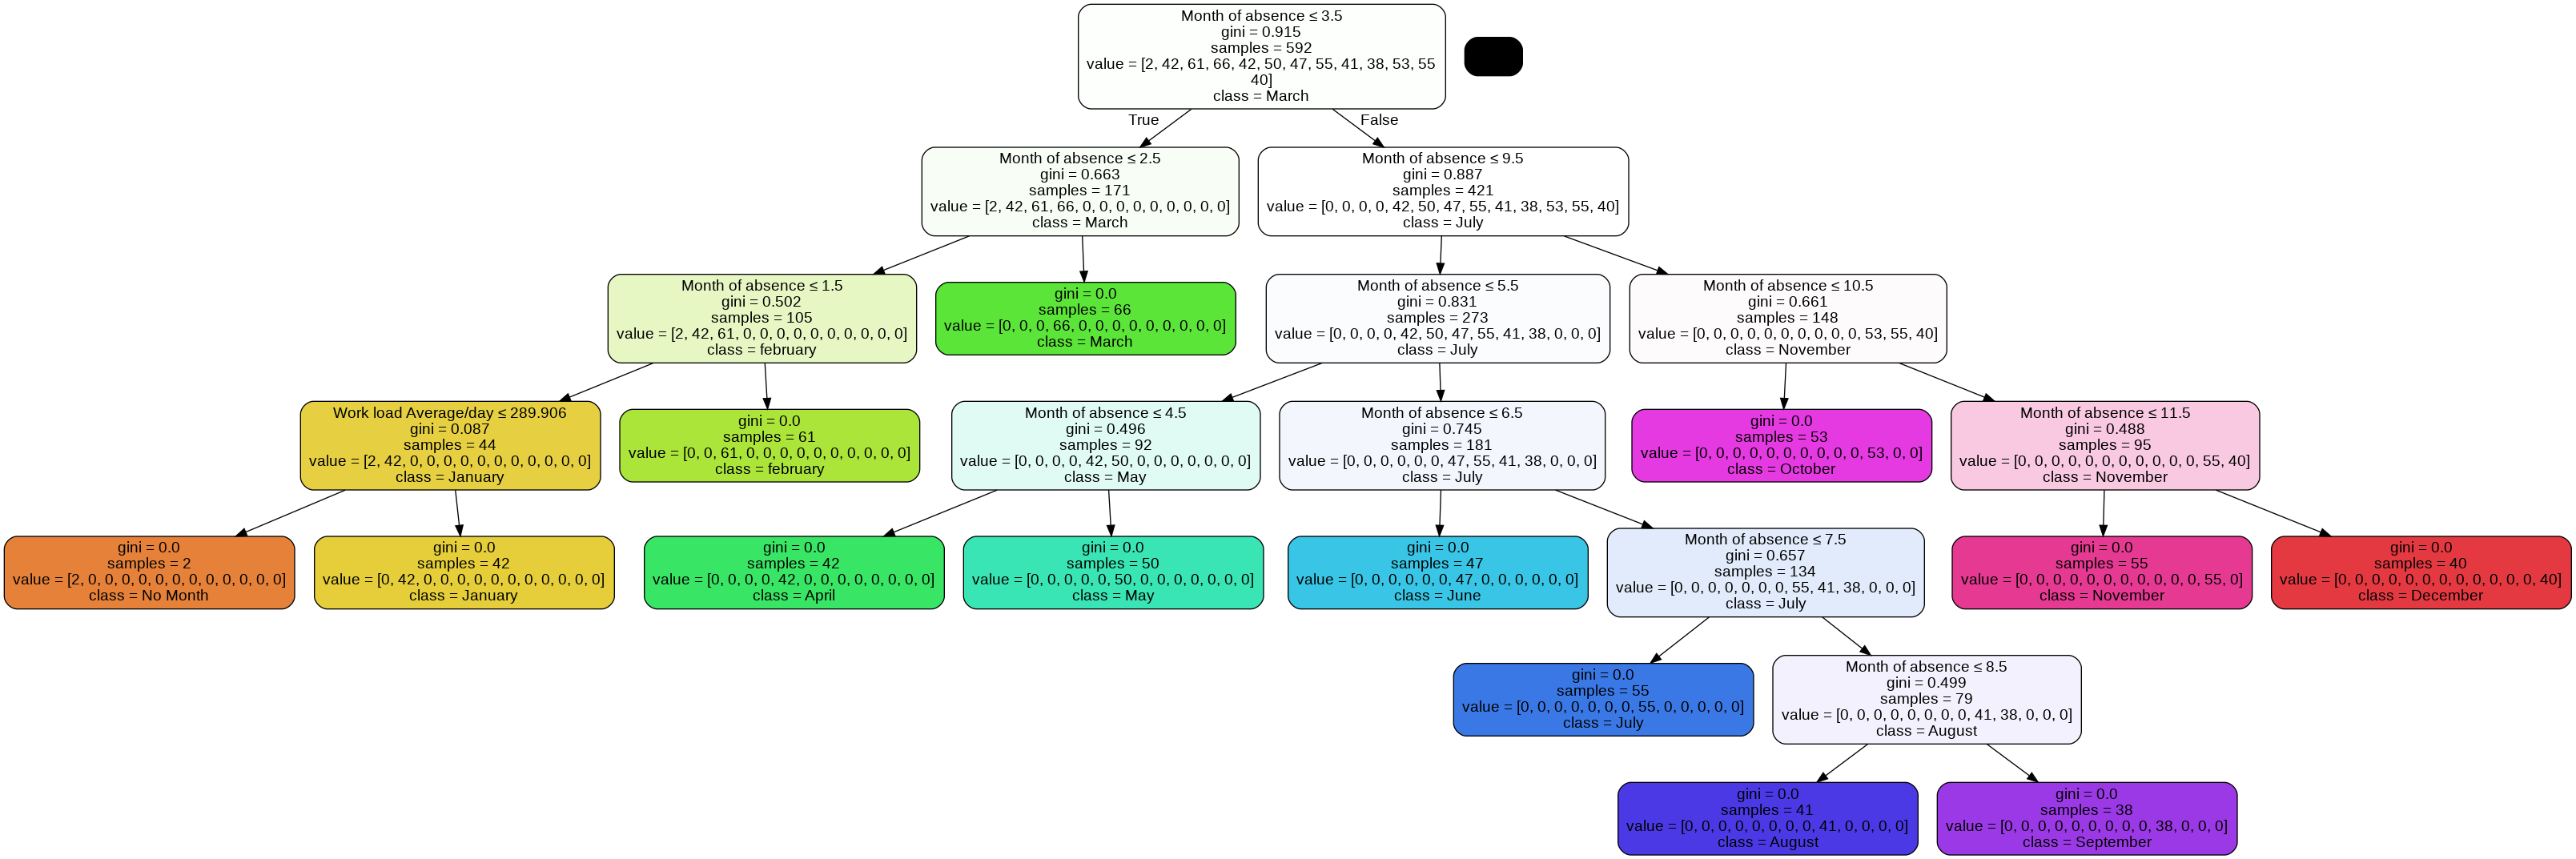

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features_new,class_names=['No Month', 'January', 'february',
                                                                                       'March', 'April', 'May', 'June',
                                                                                       'July', 'August', 'September', 'October','November', 'December'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism.png')
Image(graph.create_png())

# Challenge 2

For this challenge we will use a different data set on banking information. This set contains data on various individuals, their banking status, and how much marketing content they have received from the bank. You are to create a model that predicts whether or not they will subscribe to a term deposit, indicated by the variable **y** in the dataset.

For more information about the various columns, take a look at this [site](https://data.world/data-society/bank-marketing-data)

How accurate is the model you've created? What parameters have you used to tweak it? 

Once you are confident with the model you've created, bring in this separate dataset:


```
further_test = pd.read_csv('https://query.data.world/s/qy4uqnoc56ydidfkkneozx3rmmmq7o', delimiter = ';')
```

Test your model's accuracy against this new set. What can you conclude about the fit of your model?


In [ ]:
further_test = pd.read_csv('https://query.data.world/s/qy4uqnoc56ydidfkkneozx3rmmmq7o', delimiter = ';')
further_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
further_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/nr56ywwu5g7m5lystbjm25ouxj2l6e', delimiter = ';')
df.columns
# Your code goes here

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df[["job"]])
oe_results
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
